In [1]:
#hide earrings 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree

In [2]:
df = pd.read_csv('headbrain.csv')
print(df.shape)
df.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [3]:
df['Gender'].replace({1:'male',2:'female'},inplace=True)

In [4]:
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,male,1,4512,1530
1,male,1,3738,1297
2,male,1,4261,1335
3,male,1,3777,1282
4,male,1,4177,1590


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               237 non-null    object
 1   Age Range            237 non-null    int64 
 2   Head Size(cm^3)      237 non-null    int64 
 3   Brain Weight(grams)  237 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ KB


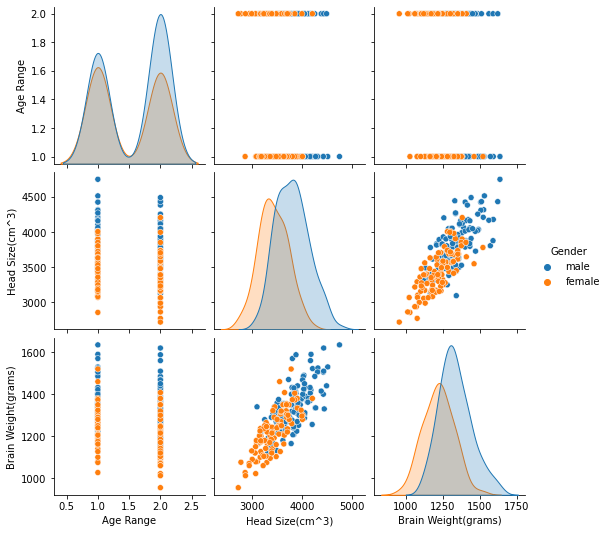

In [7]:
sns.pairplot(data= df,hue='Gender')
plt.show()

<AxesSubplot:>

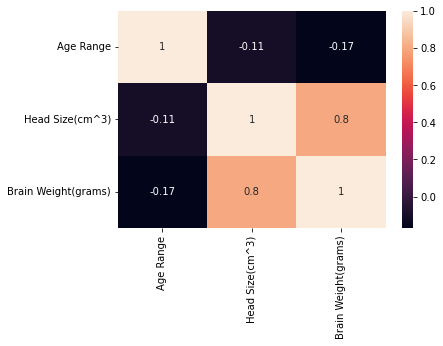

In [8]:
sns.heatmap(df.corr(),annot=True)

In [9]:
y = df['Gender']
X = df.drop('Gender',axis=1)

In [10]:
y.head()

0    male
1    male
2    male
3    male
4    male
Name: Gender, dtype: object

In [11]:
X.head()

,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,4512,1530
1,1,3738,1297
2,1,4261,1335
3,1,3777,1282
4,1,4177,1590


In [12]:
le = LabelEncoder()
y = le.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)
#random_state it take same size of simple at every time

In [14]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
y_pred = dt.predict(X_test)

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.58      0.61        31
           1       0.70      0.76      0.73        41

    accuracy                           0.68        72
   macro avg       0.67      0.67      0.67        72
weighted avg       0.68      0.68      0.68        72



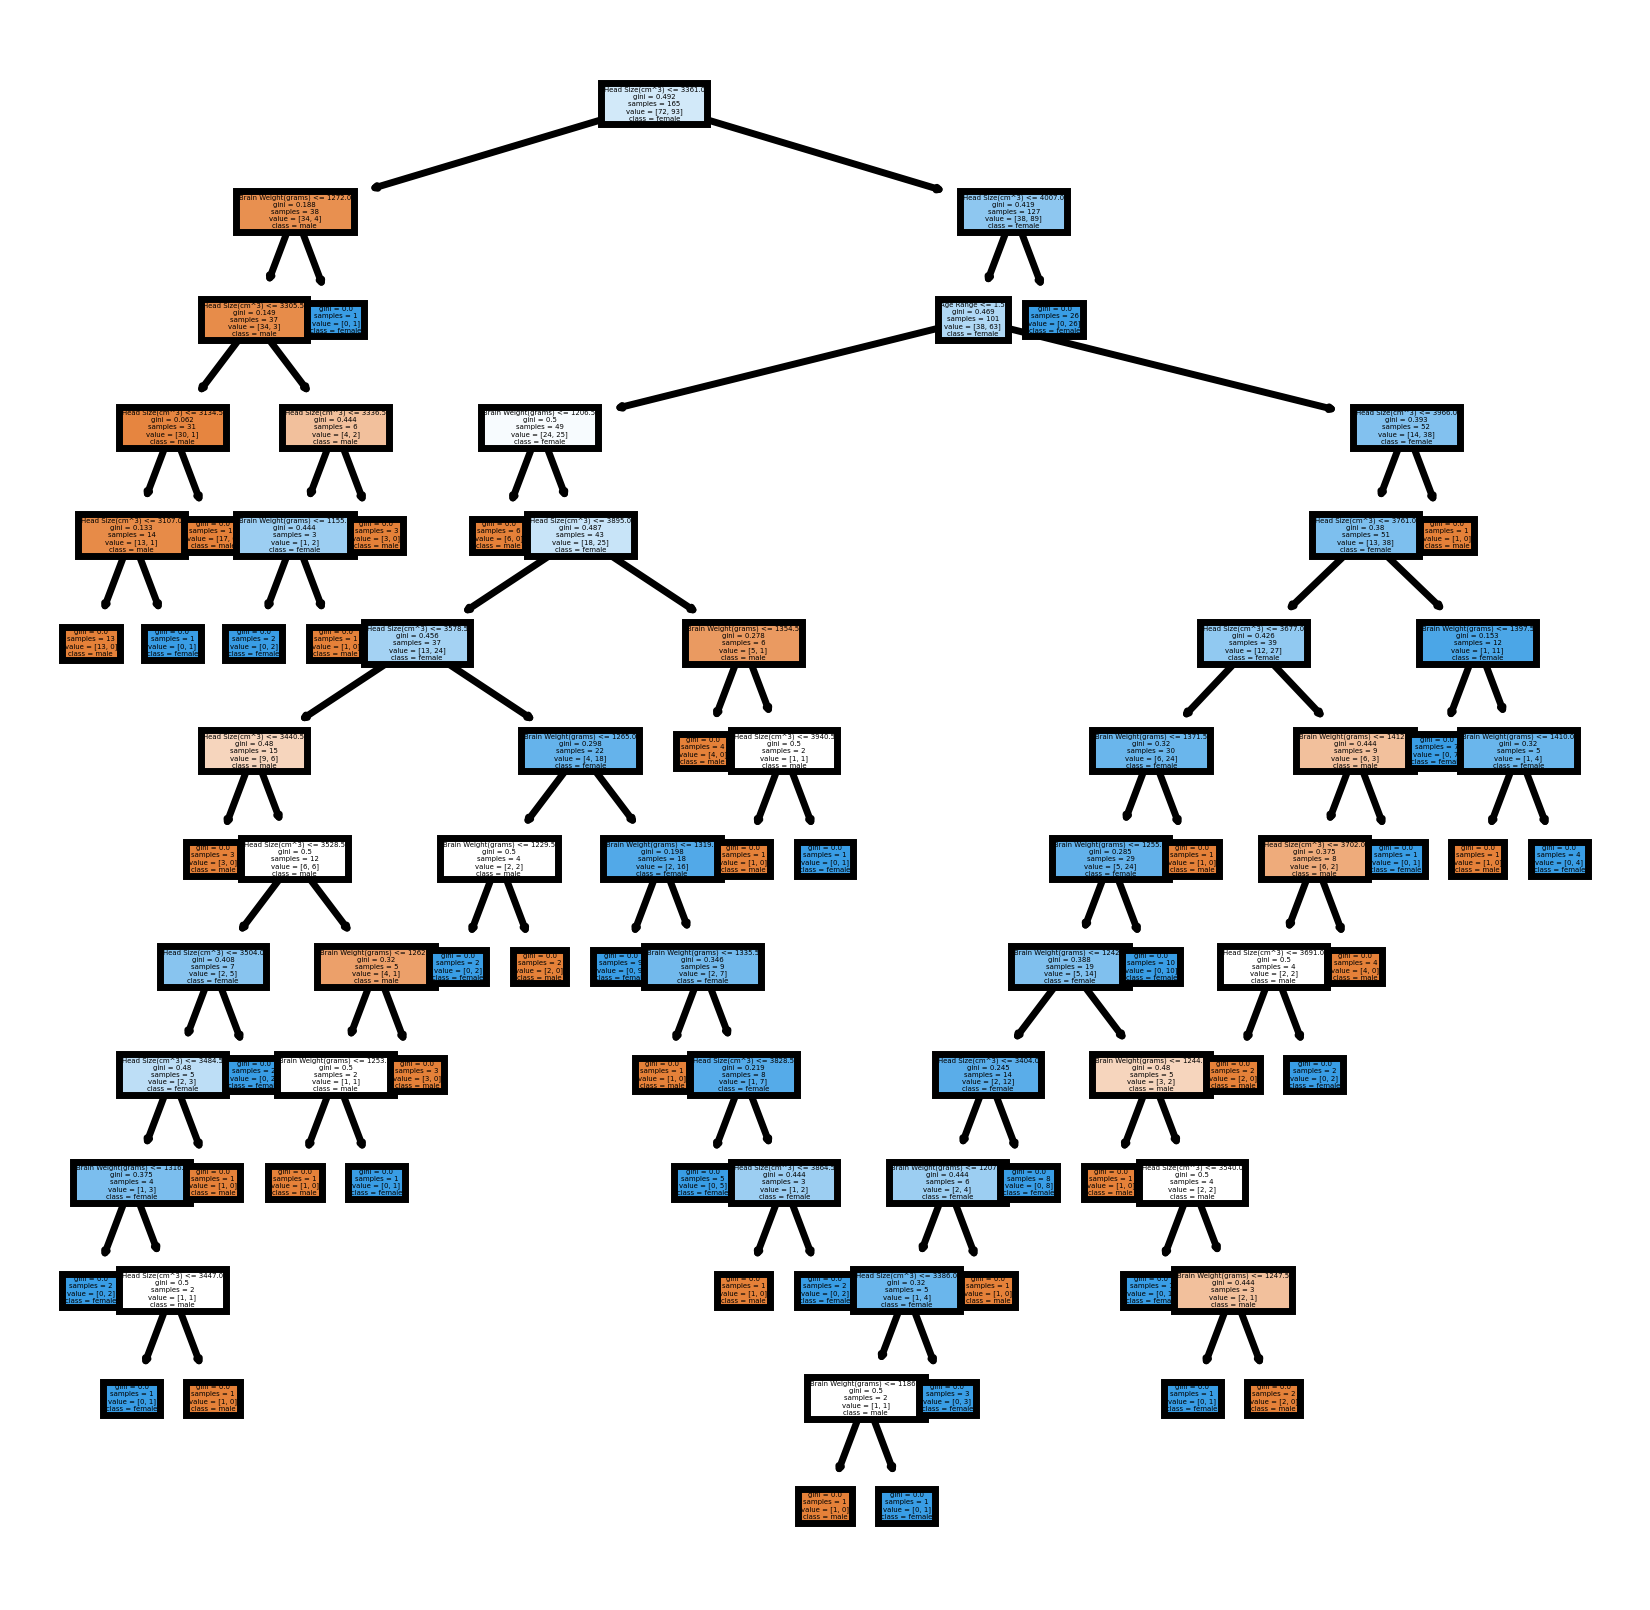

In [17]:
fn = ["Age Range", "Head Size(cm^3)","Brain Weight(grams)"]
cn = ['male','female']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 500)
tree.plot_tree(dt,
              feature_names = fn,
              class_names = cn,
              filled = True);
fig.savefig('imagename.png')